In [1]:
import sys
sys.path.append('../scripts')  
from models import *
from df_handling import * 
from text_embedding import *
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#training kai testing me ola ta data kai 0.2 split
#load training datasets training ta panta - testing tin vasi tis postgres
train1 = pd.read_csv('../data/fullfacts_emb.csv')
train2 = pd.read_csv('../data/greek_web_scraping_emb.csv')
train3 = pd.read_csv('../data/snopes2_emb.csv', nrows=1000)
train4 = pd.read_csv('../data/reuters_emb.csv')

train1 = unravel_df(train1, ['text_embedding'])
train2 = unravel_df(train2, ['text_embedding'])
train3 = unravel_df(train3, ['text_embedding'])
train4 = unravel_df(train4, ['text_embedding'])

In [3]:
train1.label.value_counts()

0.0    1126
2.0     237
3.0      50
4.0      23
1.0      14
Name: label, dtype: int64

In [4]:
df = pd.concat([train1,train2,train3,train4], ignore_index=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(3345, 4)

In [5]:
df = df[df.label<=2]
df.reset_index(drop=True, inplace=True)

In [6]:
arr = [df.iloc[i,2] for i in range(len(df))]

X_train, X_test, y_train, y_test= train_test_split(arr  , np.array(df.iloc[:,3]).astype('int'), test_size=0.2, random_state=42)

Model Accuracy: 0.686

Model Recall: 0.686

Model Precision: 0.794

Model F1-Score: 0.724

Cross validation score: [0.602 0.652 0.687 0.72  0.634 0.679 0.667 0.687 0.621 0.667]

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.68      0.74       371
           1       0.89      0.72      0.79       193
           2       0.19      0.64      0.30        44

    accuracy                           0.69       608
   macro avg       0.63      0.68      0.61       608
weighted avg       0.79      0.69      0.72       608




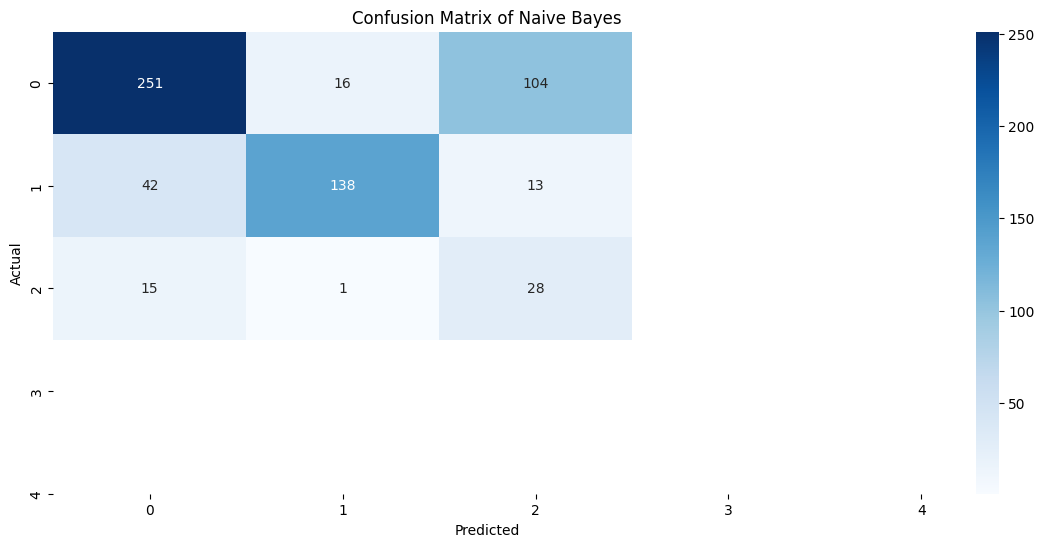

In [7]:
NaiveBayes(X_train, X_test, y_train, y_test)

Model Accuracy: 0.834

Model Recall: 0.834

Model Precision: 0.79

Model F1-Score: 0.8

Cross validation score: [0.84  0.844 0.794 0.852 0.819 0.823 0.807 0.831 0.819 0.815]

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       371
           1       0.97      0.73      0.83       193
           2       0.00      0.00      0.00        44

    accuracy                           0.83       608
   macro avg       0.59      0.57      0.57       608
weighted avg       0.79      0.83      0.80       608




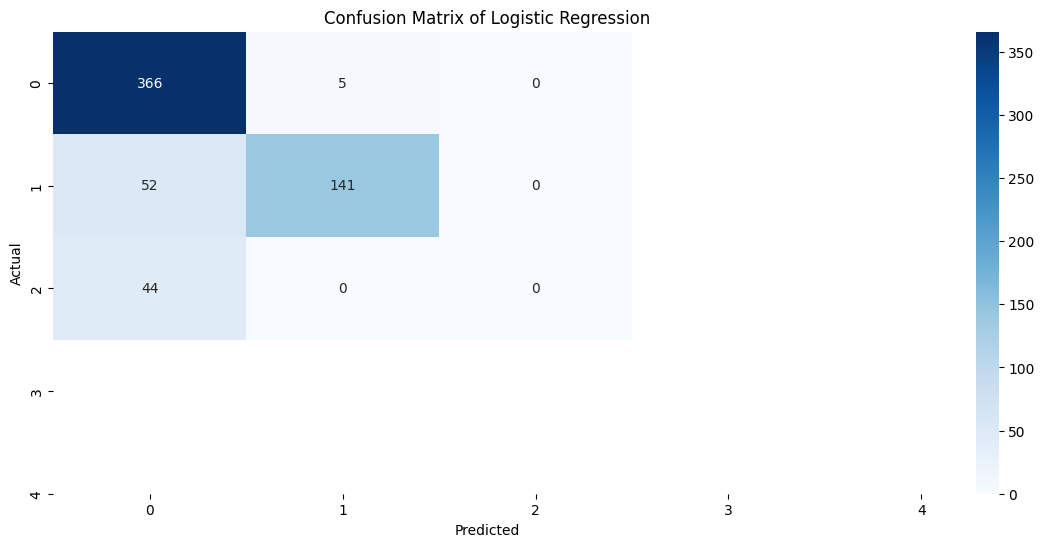

In [8]:
LogisticReg(X_train, X_test, y_train, y_test)   

  File "c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Model Accuracy: 0.793

Model Recall: 0.793

Model Precision: 0.777

Model F1-Score: 0.771

Cross validation score: [0.779 0.811 0.757 0.807 0.761 0.786 0.749 0.786 0.778 0.765]

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85       371
           1       0.92      0.67      0.78       193
           2       0.23      0.07      0.11        44

    accuracy                           0.79       608
   macro avg       0.64      0.56      0.58       608
weighted avg       0.78      0.79      0.77       608




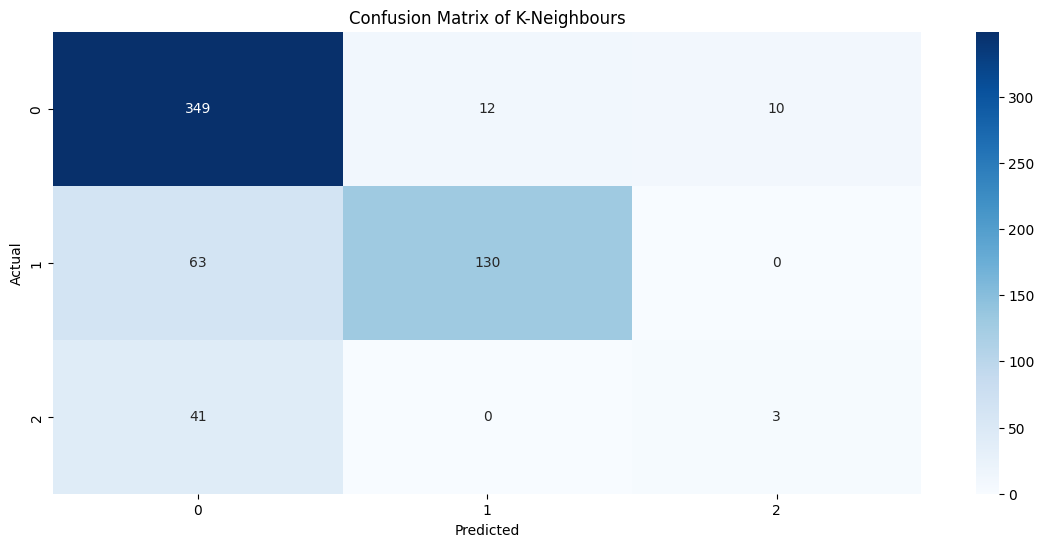

In [9]:
KNeigh(X_train, X_test, y_train, y_test)

Model Accuracy: 0.836

Model Recall: 0.836

Model Precision: 0.792

Model F1-Score: 0.802

Cross validation score: [0.848 0.852 0.798 0.848 0.815 0.823 0.815 0.831 0.823 0.823]

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       371
           1       0.97      0.73      0.83       193
           2       0.00      0.00      0.00        44

    accuracy                           0.84       608
   macro avg       0.59      0.57      0.57       608
weighted avg       0.79      0.84      0.80       608




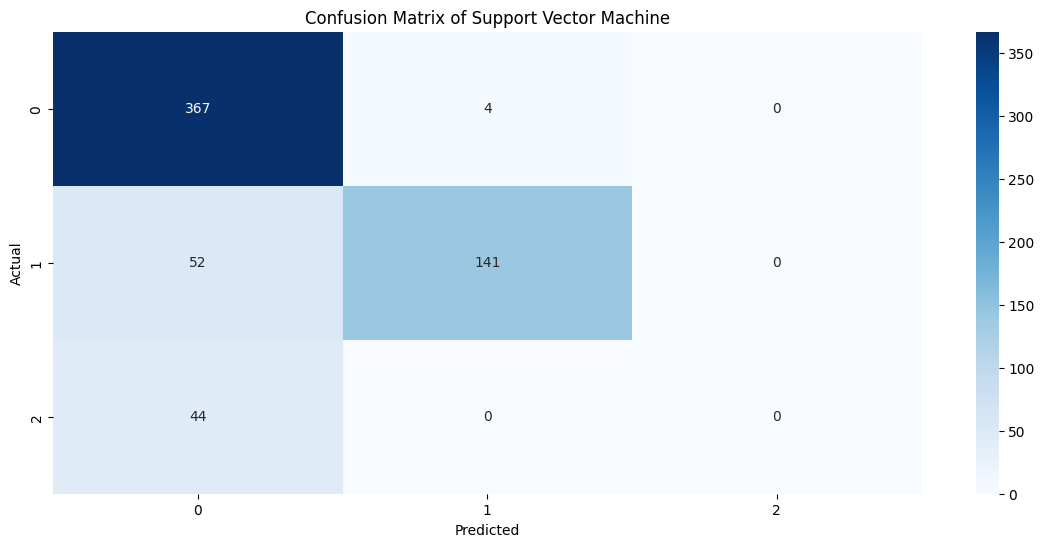

In [10]:
SVM(X_train, X_test, y_train, y_test)

Model Accuracy: 0.653

Model Recall: 0.653

Model Precision: 0.674

Model F1-Score: 0.663

Cross validation score: [0.648 0.746 0.626 0.63  0.634 0.65  0.654 0.642 0.646 0.626]

Classification report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73       371
           1       0.66      0.64      0.65       193
           2       0.12      0.18      0.15        44

    accuracy                           0.65       608
   macro avg       0.51      0.51      0.51       608
weighted avg       0.67      0.65      0.66       608




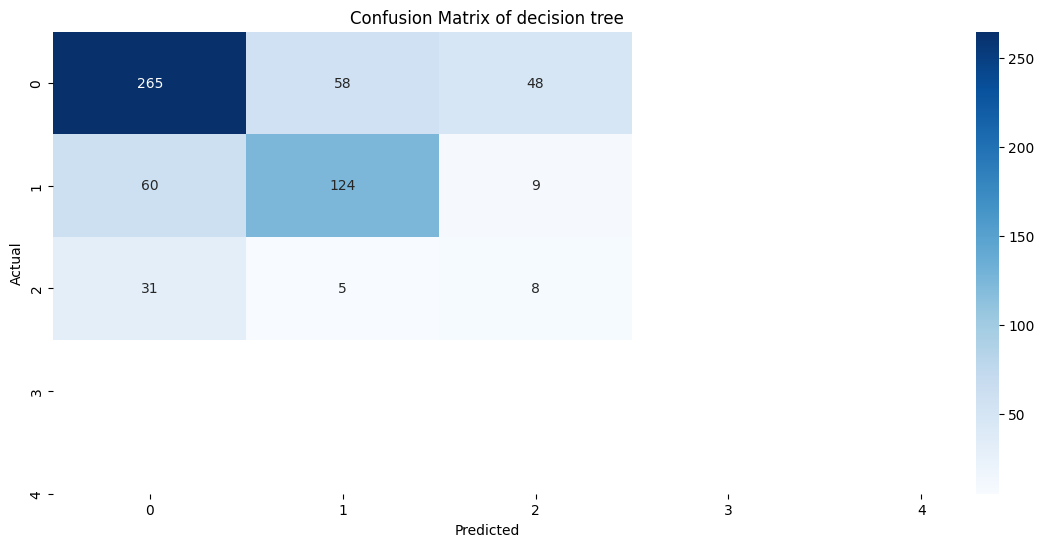

In [11]:
DecisionTree(X_train, X_test, y_train, y_test)

Model Accuracy: 0.826

Model Recall: 0.826

Model Precision: 0.786

Model F1-Score: 0.791

Cross validation score: [0.807 0.828 0.778 0.84  0.811 0.782 0.786 0.823 0.811 0.811]

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.99      0.87       371
           1       0.97      0.70      0.81       193
           2       0.00      0.00      0.00        44

    accuracy                           0.83       608
   macro avg       0.58      0.56      0.56       608
weighted avg       0.79      0.83      0.79       608




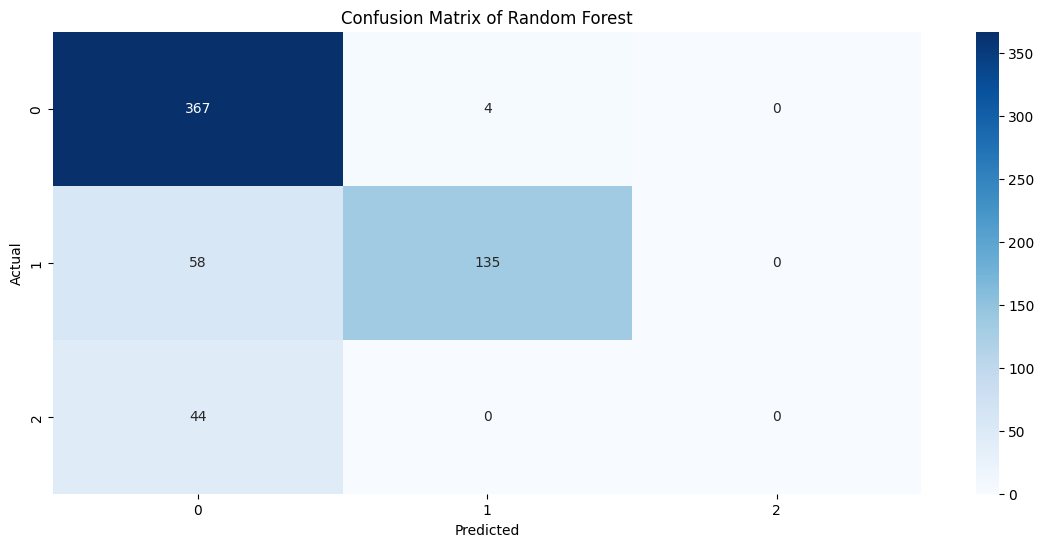

In [12]:
RandomForest(X_train, X_test, y_train, y_test)

In [13]:
MLP(X_train, X_test, y_train, y_test)